# Using the techindicators.py functions

This example notebook shows how to import the functions from techindicators.py, carry out calculations with them, and plot the resulting data.  To use this notebook, place this notebook file, example_data.csv file, and technindicators.py file all in the same directory.  Then open the notebook file using the Jupyter client in order to execute and modify the code in the cells below.  This notebook requires that Numpy, Matplotlib, and Datetime modules be installed.

In [1]:
%matplotlib inline
import numpy as np 
from techindicators import * # This line imports all functions from techindicators.py
import matplotlib.pyplot as plt
from datetime import datetime

## Importing data

The example_data.csv file contains daily trading data for the SPY exchange traded fund.  The 6 columns of data contain the date, open price, high price, low price, closing price, and trading volume, in that order.  Numpy is used to import the data from the csv file.  Individual columns of price and volume data are stored as Numpy arrays containing the numbers as floats.  The date data are stored as a Numpy array in datetime64 format. 

In [2]:
ticker='SPY'
stockdata = np.genfromtxt('example_data.csv', delimiter=',')
sd_open = stockdata[:,1]
sd_high = stockdata[:,2]
sd_low = stockdata[:,3]
sd_close = stockdata[:,4]
sd_volume = stockdata[:,5]
sd_dates = np.loadtxt('example_data.csv', delimiter=',', usecols=(0), dtype='datetime64[D]')

## Calculating moving averages

The 50 day simple moving average, 20 day exponential moving average, and 10,2,30 day Kaufman adpative moving average are calculated below.

In [3]:
sma50 = sma(sd_close,50) # calculate 50 day SMA of closing price
ema20 = ema(sd_close,20) # calculate 20 day EMA of closing price
kama_sd = kama(sd_close,10,2,30) # calculate standard Kaufman adaptive moving average

## Plotting prices and moving averages

The array length of the moving averages depends upon the number of periods used for averaging.  As a result, the x-axis data (in this case the dates) must be truncated to match the y-axis data for each moving average.  Below, Numpy array slicing is used to truncate the date data and the dates are also converted to the datetime data format for matplotlib.  Note that the moving averages do not appear smooth.  This is an artifact of matplotlib placing gaps in the data on dates where there is no trading (weekends and holidays).

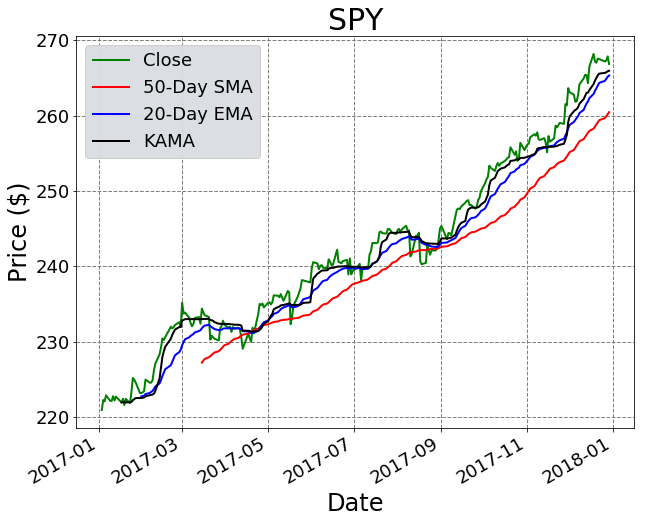

In [4]:
# plot daily closing price of SPY along with 50-day SMA, 20-day EMA, and KAMA
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(sd_dates.astype(datetime),sd_close,color='green',lw=2,label="Close")
ax.plot(sd_dates[len(sd_dates)-len(sma50):].astype(datetime),sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(sd_dates[len(sd_dates)-len(ema20):].astype(datetime),ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(sd_dates[len(sd_dates)-len(kama_sd):].astype(datetime),kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Date',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
fig.autofmt_xdate()
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

Rather than placing dates on the x-axis, it is possible to create an array containing the trading days of the year numbered in order.  This eliminates the artifacts introduced by matplotlib's handling of weekends and trading holidays.

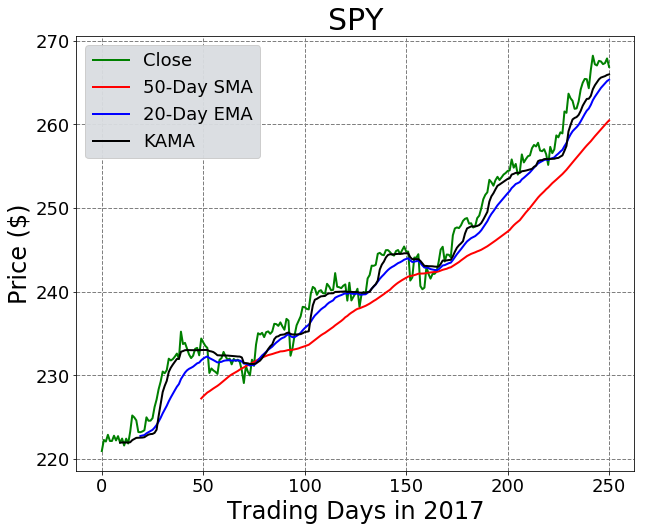

In [5]:
tradedays = np.arange(len(sd_close))
# plot daily closing price of SPY along with 50-day SMA, 20-day EMA, and KAMA
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(tradedays,sd_close,color='green',lw=2,label="Close")
ax.plot(tradedays[len(sd_dates)-len(sma50):],sma50,color='red',lw=2,label='50-Day SMA')
ax.plot(tradedays[len(sd_dates)-len(ema20):],ema20,color='blue',lw=2,label='20-Day EMA')
ax.plot(tradedays[len(sd_dates)-len(kama_sd):],kama_sd,color='black',lw=2,label='KAMA')
ax.set_title(ticker,fontsize=30)
ax.set_xlabel('Trading Days in 2017',fontsize=24)
ax.set_ylabel('Price ($)',fontsize=24)
ax.legend(loc='best', frameon=True, fancybox=True, framealpha=0.95, fontsize=18, facecolor='#D9DDE1')
ax.grid(color='gray', linestyle='--', linewidth=1)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

## Calculating and displaying the latest values of technical indicators

Below, the 20-day commodity channel index, 14-day average true range, and 14-day relative strength index are calculated.  The values of these indicators are then printed out for the last trading day of the year.

In [6]:
cci20 = cci(sd_high,sd_low,sd_close,20) # 20-day commodity channel index
atr14 = atr(sd_high,sd_low,sd_close,14) # 14-day average true range
rsi14 = rsi(sd_close,14) # 14-day relative strength index
print('Technical indicator values for {} on {}:'.format(ticker,sd_dates[-1]))
print('')
print('The 20-day CCI was {:.2f}.'.format(cci20[-1]))
print('The 14-day ATR was {:.2f}.'.format(atr14[-1]))
print('The 14-day RSI was {:.2f}.'.format(rsi14[-1]))

Technical indicator values for SPY on 2017-12-29:

The 20-day CCI was 63.75.
The 14-day ATR was 1.43.
The 14-day RSI was 63.92.
